In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
#EDA에 필요한 함수 먼저 불러오기

In [3]:
df = pd.read_csv('/Users/healthcarelab/Desktop/heart/heart.csv') #데이터 불러오고

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
drop_ca = df[df['ca'] == 4].index

In [8]:
drop_ca

Int64Index([92, 158, 163, 164, 251], dtype='int64')

In [9]:
sample = df.loc[[92, 158, 163, 164, 251], :]
sample.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [10]:
df = df.drop(drop_ca)

In [11]:
df.ca.value_counts() # ca=4인 것들 다 뺌

0    175
1     65
2     38
3     20
Name: ca, dtype: int64

In [12]:
drop_thal = df[df['thal'] == 0].index
drop_thal

Int64Index([48, 281], dtype='int64')

In [13]:
sample_2 = df.loc[[48, 281], :]
sample_2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [14]:
df = df.drop(drop_thal)

In [15]:
df.thal.value_counts() # thal=0인 2개 모두 뺌.

2    163
3    115
1     18
Name: thal, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 302
Data columns (total 14 columns):
age         296 non-null int64
sex         296 non-null int64
cp          296 non-null int64
trestbps    296 non-null int64
chol        296 non-null int64
fbs         296 non-null int64
restecg     296 non-null int64
thalach     296 non-null int64
exang       296 non-null int64
oldpeak     296 non-null float64
slope       296 non-null int64
ca          296 non-null int64
thal        296 non-null int64
target      296 non-null int64
dtypes: float64(1), int64(13)
memory usage: 34.7 KB


In [15]:
df.describe() #303-7=296 data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,296.000000,296.000000,296.000000,296.00000,296.000000,296.00000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,54.523649,0.679054,0.959459,131.60473,247.155405,0.14527,0.523649,149.560811,0.327703,1.059122,1.395270,0.679054,2.327703,0.540541
std,9.059471,0.467631,1.034184,17.72662,51.977011,0.35297,0.526692,22.970792,0.470171,1.166474,0.618235,0.939726,0.585743,0.499198
min,29.000000,0.000000,0.000000,94.00000,126.000000,0.00000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,0.000000,120.00000,211.000000,0.00000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.00000,242.500000,0.00000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.00000,275.250000,0.00000,1.000000,166.000000,1.000000,1.650000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.00000,564.000000,1.00000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [16]:
 #일단 심장질환 가지고 있는 사람 수 파악하기
df.target.value_counts() # 0이 심장질환 가진 사람!!

1    160
0    136
Name: target, dtype: int64

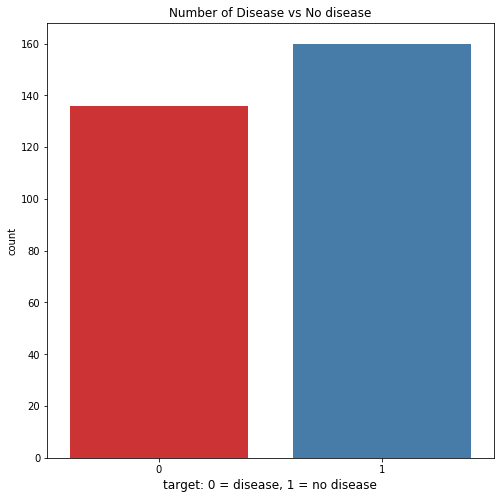

In [39]:
#데이터 시각화
f, ax = plt.subplots(1, 1, figsize=(8,8))
sns.countplot(x='target',data=df, ax=ax, palette='Set1')
# 303명 중 136명이 심장질환을 가지고 있다.
ax.set_title('Number of Disease vs No disease')
ax.set_xlabel('target: 0 = disease, 1 = no disease', size =12)
plt.show()

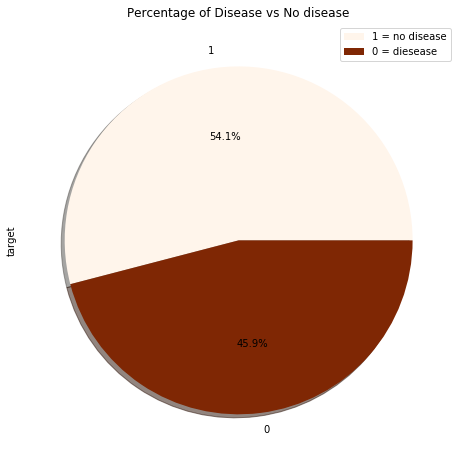

In [30]:
f, ax = plt.subplots(1, 1, figsize=(18,8))
df.target.value_counts().plot.pie( autopct='%1.1f%%', ax=ax, shadow=True,  cmap='Oranges')
ax.set_title('Percentage of Disease vs No disease')
ax.set_ylabel('target')
ax.legend(['1 = no disease', '0 = diesease'])

In [18]:
count_noHD = len(df[df.target == 1])
count_HD = len(df[df.target == 0])
print("Percentage of haven't HD: {:.2f}%".format((count_noHD / (len(df.target))*100)))
print("Percentage of have HD: {:.2f}%".format((count_HD / (len(df.target))*100)))

Percentage of haven't HD: 54.05%
Percentage of have HD: 45.95%


Categorical Variables -------------------------------

1. SEX

In [19]:
#sex male=1, female=0 남녀 수
df.sex.value_counts()

1    201
0     95
Name: sex, dtype: int64

In [20]:
pd.crosstab(df['sex'], df['target'], margins=True).style.background_gradient(cmap='summer_r')
#남자 HD가 112명 -> 여자보다 높음.

target,0,1,All
sex,,,
0,24,71,95
1,112,89,201
All,136,160,296


In [21]:
HD_male = len(df[(df['sex'] == 1) & (df['target'] == 0)])
HD_female = len(df[(df['sex'] == 0) & (df['target'] == 0)])
print("Percentage of HD male: {:.2f}%".format((HD_male / (len(df[df.target == 0]))*100)))
print("Percentage of HD female: {:.2f}%".format((HD_female / (len(df[df.target == 0]))*100)))

Percentage of HD male: 82.35%
Percentage of HD female: 17.65%


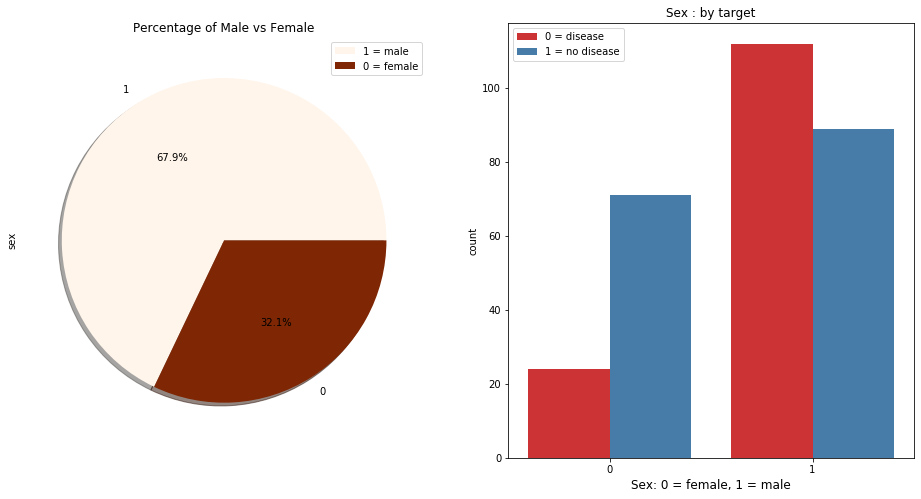

In [45]:
f, ax = plt.subplots(1, 2, figsize=(16,8))
df.sex.value_counts().plot.pie( autopct='%1.1f%%', ax=ax[0], shadow=True,  cmap='Oranges')
ax[0].set_title('Percentage of Male vs Female')
ax[0].set_ylabel('sex')
ax[0].legend(['1 = male', '0 = female'])

sns.countplot(x='sex', data=df, hue='target', palette='Set1', ax=ax[1])
ax[1].set_title('Sex : by target')
ax[1].set_xlabel('Sex: 0 = female, 1 = male', size =12)
ax[1].legend(['0 = disease', '1 = no disease'])
plt.show()

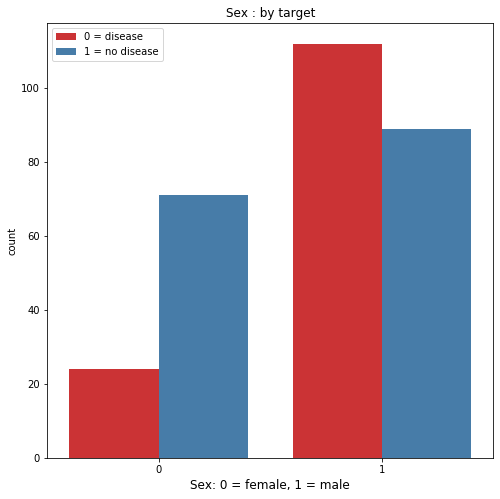

In [54]:
f, ax = plt.subplots(1, 1, figsize=(8,8))
sns.countplot(x='sex', data=df, hue='target', palette='Set1', ax=ax)
ax.set_title('Sex : by target')
ax.set_xlabel('Sex: 0 = female, 1 = male', size =12)
ax.legend(['0 = disease', '1 = no disease'])

plt.show()

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(18,8))
df[['sex', 'target']].groupby(['sex'], as_index=True).mean(by = 'target').plot.bar(ax=ax[0])
ax[0].set_title('HD percentage')

In [53]:
from scipy import stats
a = stats.ttest_ind(df[df['target']==0].sex, df[df['target']==1].sex)
print('sex difference Disease vs No disease: {:.3f}'.format(a.pvalue))
a.pvalue

sex difference Disease vs No disease: 0.000


5.968010730968457e-07

2. Chest Pain Type 

0 == asymptomatic /
1 == atypical angina /
2 == non-anginal pain /
3 == typical angina

In [23]:
df.cp.value_counts() 

0    141
2     83
1     49
3     23
Name: cp, dtype: int64

In [24]:
pd.crosstab(df['cp'], df['target'], margins=True).style.background_gradient(cmap='summer_r')

target,0,1,All
cp,,,
0,102,39,141
1,9,40,49
2,18,65,83
3,7,16,23
All,136,160,296


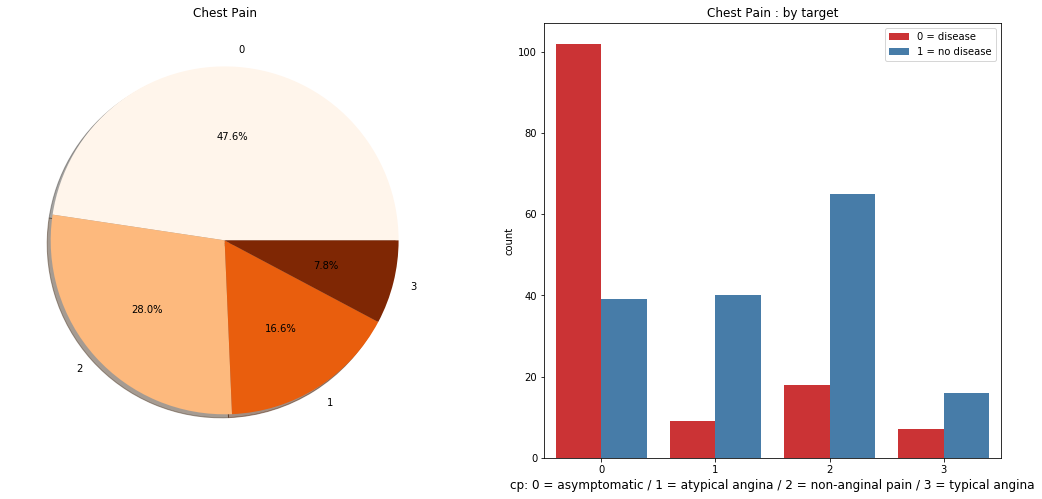

In [55]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
df.cp.value_counts().plot.pie( autopct='%1.1f%%', ax=ax[0], shadow=True,  cmap='Oranges')
ax[0].set_title('Chest Pain')
ax[0].set_ylabel('')

sns.countplot(x='cp', data=df, hue='target', palette='Set1', ax=ax[1])
ax[1].set_title('Chest Pain : by target')
ax[1].set_xlabel('cp: 0 = asymptomatic / 1 = atypical angina / 2 = non-anginal pain / 3 = typical angina', size =12)
ax[1].legend(['0 = disease', '1 = no disease'])
plt.show()

In [26]:
HD_cp0 = len(df[(df['cp'] == 0) & (df['target'] == 0)])
HD_cp1 = len(df[(df['cp'] == 1) & (df['target'] == 0)])
HD_cp2 = len(df[(df['cp'] == 2) & (df['target'] == 0)])
HD_cp3 = len(df[(df['cp'] == 3) & (df['target'] == 0)])

print("Percentage of asymptomatic: {:.2f}%".format((HD_cp0 / (len(df[df.target == 0]))*100)))
print("Percentage of atypical angina: {:.2f}%".format((HD_cp1 / (len(df[df.target == 0]))*100)))
print("Percentage of non-anginal pain: {:.2f}%".format((HD_cp2 / (len(df[df.target == 0]))*100)))
print("Percentage of typical angina: {:.2f}%".format((HD_cp3 / (len(df[df.target == 0]))*100)))

Percentage of asymptomatic: 75.00%
Percentage of atypical angina: 6.62%
Percentage of non-anginal pain: 13.24%
Percentage of typical angina: 5.15%


3. Fasting Blood Sugar (fbs)  

1 = fbs > 120 mg/dl /
0 = fbs < 120mg/dl

In [27]:
df.fbs.value_counts() 

0    253
1     43
Name: fbs, dtype: int64

In [28]:
pd.crosstab(df['fbs'], df['target'], margins=True).style.background_gradient(cmap='summer_r')

target,0,1,All
fbs,,,
0,116,137,253
1,20,23,43
All,136,160,296


In [29]:
HD_high_fbs = len(df[(df['fbs'] == 1) & (df['target'] == 0)])
HD_low_fbs = len(df[(df['fbs'] == 0) & (df['target'] == 0)])

print("Percentage of HD high fbs: {:.2f}%".format((HD_high_fbs / (len(df[df.target == 0]))*100)))
print("Percentage of HD low fbs: {:.2f}%".format((HD_low_fbs / (len(df[df.target == 0]))*100)))

Percentage of HD high fbs: 14.71%
Percentage of HD low fbs: 85.29%


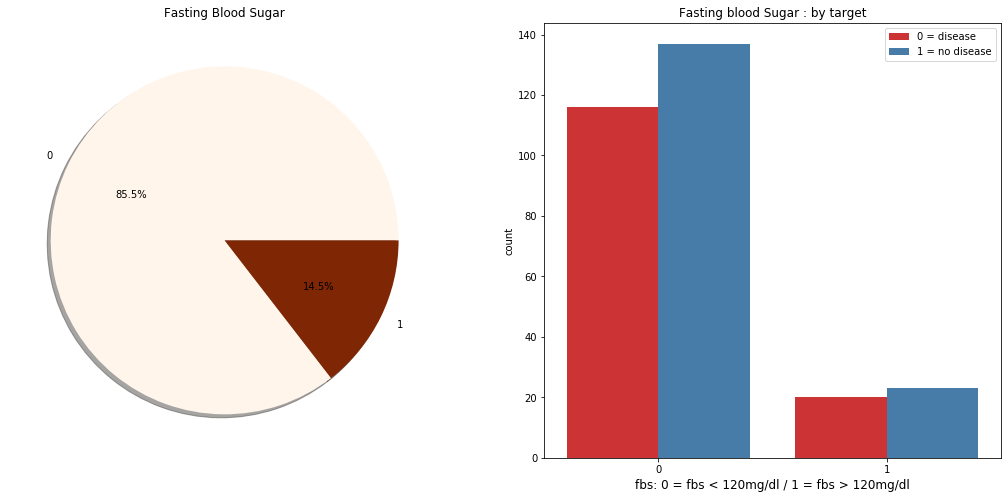

In [56]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
df.fbs.value_counts().plot.pie( autopct='%1.1f%%', ax=ax[0], shadow=True,  cmap='Oranges')
ax[0].set_title('Fasting Blood Sugar')
ax[0].set_ylabel('')

sns.countplot(x='fbs', data=df, hue='target', palette='Set1', ax=ax[1])
ax[1].set_title('Fasting blood Sugar : by target')
ax[1].set_xlabel('fbs: 0 = fbs < 120mg/dl / 1 = fbs > 120mg/dl', size =12)
ax[1].legend(['0 = disease', '1 = no disease'])


plt.show()

4. Resting Electrocardiographic (restecg)

0 = showing probable /
1 = normal /
2 = having ST-T wave abnormality

In [31]:
df.restecg.value_counts()

1    147
0    145
2      4
Name: restecg, dtype: int64

In [32]:
pd.crosstab(df['restecg'], df['target'], margins=True).style.background_gradient(cmap='summer_r')

target,0,1,All
restecg,,,
0,78,67,145
1,55,92,147
2,3,1,4
All,136,160,296


In [33]:
HD_rest0 = len(df[(df['restecg'] == 0) & (df['target'] == 0)])
HD_rest1 = len(df[(df['restecg'] == 1) & (df['target'] == 0)])
HD_rest2 = len(df[(df['restecg'] == 2) & (df['target'] == 0)])

print("Percentage of HD & probable: {:.2f}%".format((HD_rest0 / (len(df[df.target == 0]))*100)))
print("Percentage of HD & normal: {:.2f}%".format((HD_rest1 / (len(df[df.target == 0]))*100)))
print("Percentage of HD & ST-T wave: {:.2f}%".format((HD_rest2 / (len(df[df.target == 0]))*100)))

Percentage of HD & probable: 57.35%
Percentage of HD & normal: 40.44%
Percentage of HD & ST-T wave: 2.21%


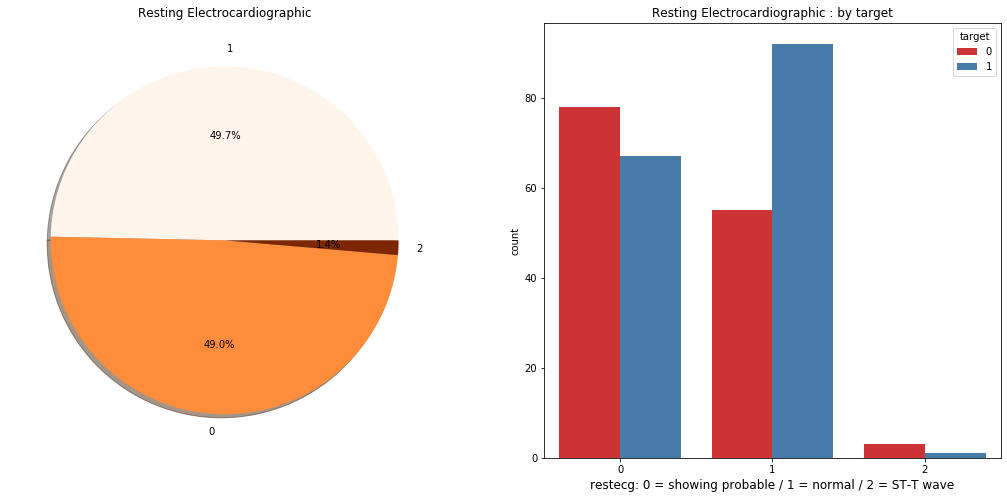

In [34]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
df.restecg.value_counts().plot.pie( autopct='%1.1f%%', ax=ax[0], shadow=True,  cmap='Oranges')
ax[0].set_title('Resting Electrocardiographic')
ax[0].set_ylabel('')

sns.countplot(x='restecg', data=df, hue='target', palette='Set1', ax=ax[1])
ax[1].set_title('Resting Electrocardiographic : by target')
ax[1].set_xlabel('restecg: 0 = showing probable / 1 = normal / 2 = ST-T wave', size =12)
plt.show()

5. Exercise Induced Angina (exang)

1 = yes / 0 = no

In [35]:
df.exang.value_counts()

0    199
1     97
Name: exang, dtype: int64

In [36]:
pd.crosstab(df['exang'], df['target'], margins=True).style.background_gradient(cmap='summer_r')

target,0,1,All
exang,,,
0,62,137,199
1,74,23,97
All,136,160,296


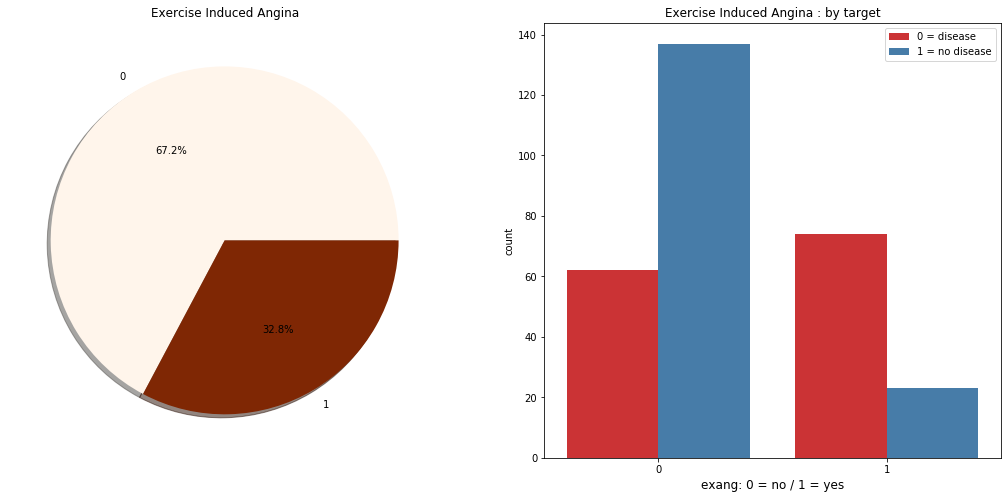

In [57]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
df.exang.value_counts().plot.pie( autopct='%1.1f%%', ax=ax[0], shadow=True,  cmap='Oranges')
ax[0].set_title('Exercise Induced Angina')
ax[0].set_ylabel('')

sns.countplot(x='exang', data=df, hue='target', palette='Set1', ax=ax[1])
ax[1].set_title('Exercise Induced Angina : by target')
ax[1].set_xlabel('exang: 0 = no / 1 = yes', size =12)
ax[1].legend(['0 = disease', '1 = no disease'])


plt.show()

6. Slope of the Peak Exercise ST segment

0 = downsloping / 1 = flat / 2 = upsloping

In [38]:
df.slope.value_counts()

2    138
1    137
0     21
Name: slope, dtype: int64

In [39]:
pd.crosstab(df['slope'], df['target'], margins=True).style.background_gradient(cmap='summer_r')

target,0,1,All
slope,,,
0,12,9,21
1,89,48,137
2,35,103,138
All,136,160,296


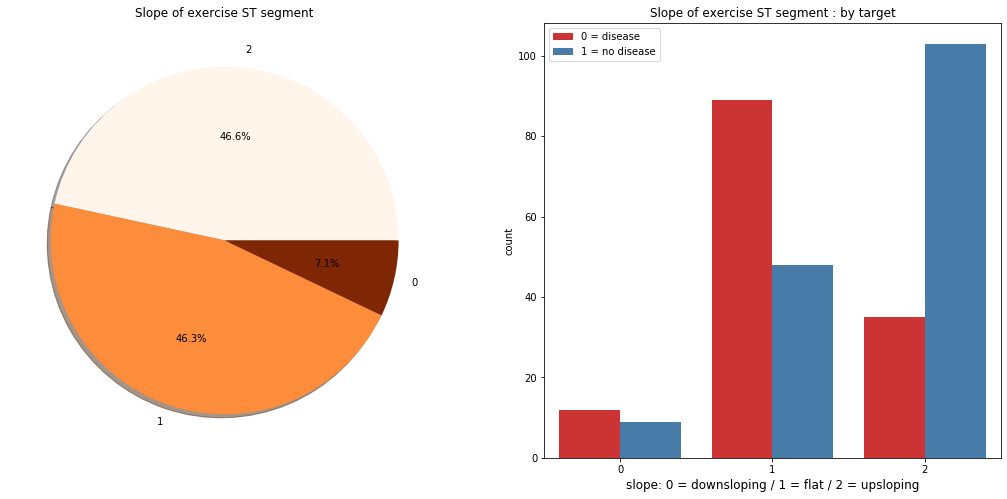

In [58]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
df.slope.value_counts().plot.pie( autopct='%1.1f%%', ax=ax[0], shadow=True,  cmap='Oranges')
ax[0].set_title('Slope of exercise ST segment')
ax[0].set_ylabel('')

sns.countplot(x='slope', data=df, hue='target', palette='Set1', ax=ax[1])
ax[1].set_title('Slope of exercise ST segment : by target')
ax[1].set_xlabel('slope: 0 = downsloping / 1 = flat / 2 = upsloping', size =12)
ax[1].legend(['0 = disease', '1 = no disease'])


plt.show()

In [41]:
HD_upsloping = len(df[(df['slope'] == 2) & (df['target'] == 0)])
print("Percentage of HD & upsloping: {:.2f}%".format((HD_upsloping / (len(df[df.target == 0]))*100)))

print("Percentage of HD & abnormal slope: {:.2f}%".format( ((1-(HD_upsloping /len(df[df.target==0])))*100)))

Percentage of HD & upsloping: 25.74%
Percentage of HD & abnormal slope: 74.26%


7. Thalassemia (thal) 유전성 빈혈?!

1 = fixed defect / 2 = normal / 3 = reversable defect

회복불가 / 정상 / 회복 가능

In [42]:
df.thal.value_counts()

2    163
3    115
1     18
Name: thal, dtype: int64

In [43]:
pd.crosstab(df['thal'], df['target'], margins=True).style.background_gradient(cmap='summer_r')

target,0,1,All
thal,,,
1,12,6,18
2,36,127,163
3,88,27,115
All,136,160,296


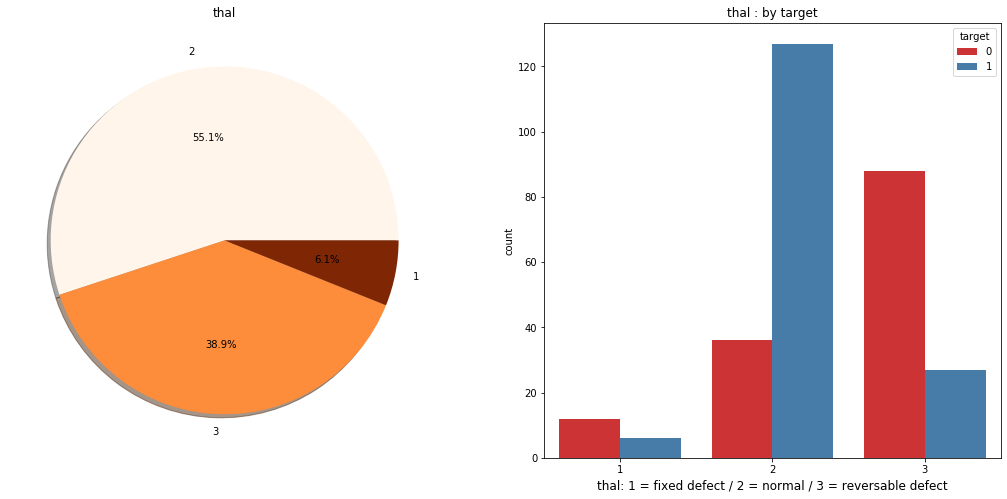

In [44]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
df.thal.value_counts().plot.pie( autopct='%1.1f%%', ax=ax[0], shadow=True,  cmap='Oranges')
ax[0].set_title('thal')
ax[0].set_ylabel('')

sns.countplot(x='thal', data=df, hue='target', palette='Set1', ax=ax[1])
ax[1].set_title('thal : by target')
ax[1].set_xlabel('thal: 1 = fixed defect / 2 = normal / 3 = reversable defect', size =12)
plt.show()

Numerical Variables ----------------------------------

1. Age

/Users/healthcarelab/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:323: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  ax.plot(x, y, color=color, label=label, **kwargs)


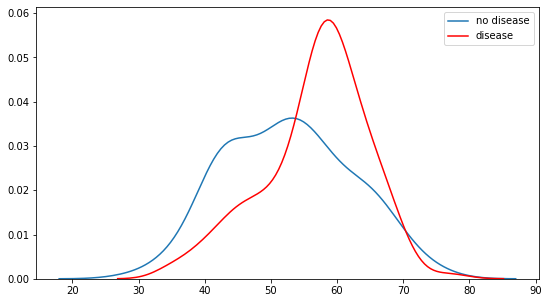

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df[df['target'] == 1]['age'], ax=ax)
sns.kdeplot(df[df['target'] == 0]['age'], c='r', ax=ax)
plt.legend(['no disease', 'disease'])
plt.show()  # 연령이 높은 사람들에서 disease 많음.

In [46]:
df[['age', 'target']].groupby(['target'], as_index=True).describe()

age                                                    
        count       mean       std   min    25%   50%   75%   max
target                                                           
0       136.0  56.735294  7.923930  35.0  52.75  58.0  62.0  77.0
1       160.0  52.643750  9.551151  29.0  44.75  52.0  59.0  76.0

2. Resting Blood Pressure (trestbps) 

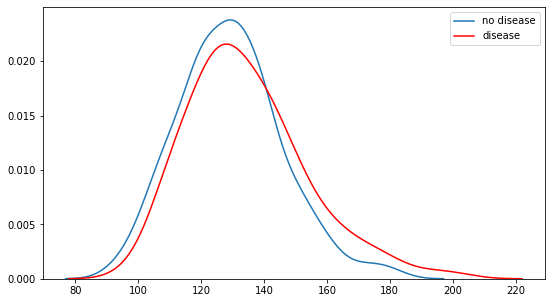

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df[df['target'] == 1]['trestbps'], ax=ax)
sns.kdeplot(df[df['target'] == 0]['trestbps'], c='r',  ax=ax)
plt.legend(['no disease', 'disease'])
plt.show() 

In [48]:
df[['trestbps', 'target']].groupby(['target'], as_index=True).describe()

trestbps                                                          
          count        mean        std    min    25%    50%    75%    max
target                                                                   
0         136.0  134.463235  18.858894  100.0  120.0  130.0  145.0  200.0
1         160.0  129.175000  16.373990   94.0  120.0  130.0  140.0  180.0

3. Cholestoral (chol) 

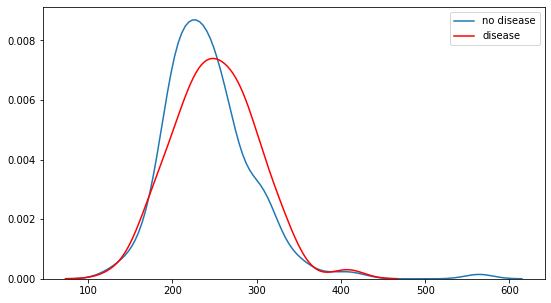

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df[df['target'] == 1]['chol'], ax=ax)
sns.kdeplot(df[df['target'] == 0]['chol'], c='r',  ax=ax)
plt.legend(['no disease', 'disease'])
plt.show() 

In [50]:
df[['chol', 'target']].groupby(['target'], as_index=True).describe()

chol                                                            
        count        mean        std    min     25%    50%     75%    max
target                                                                   
0       136.0  251.463235  49.651811  131.0  217.75  251.0  283.25  409.0
1       160.0  243.493750  53.757550  126.0  208.75  235.5  268.25  564.0

4. Maximum Heart Rate Achieved (thalach)

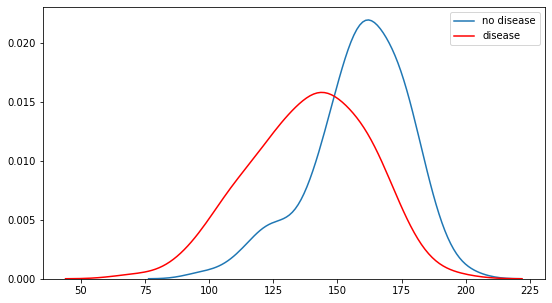

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df[df['target'] == 1]['thalach'], ax=ax)
sns.kdeplot(df[df['target'] == 0]['thalach'], c='r',  ax=ax)
plt.legend(['no disease', 'disease'])
plt.show() 

In [52]:
df[['thalach', 'target']].groupby(['target'], as_index=True).describe()

thalach                                                          
         count        mean        std   min    25%    50%     75%    max
target                                                                  
0        136.0  138.948529  22.716064  71.0  125.0  141.5  156.25  195.0
1        160.0  158.581250  19.043304  96.0  149.0  161.0  172.00  202.0

5. ST depression induced by Exercise relative to rest (oldpeak) 

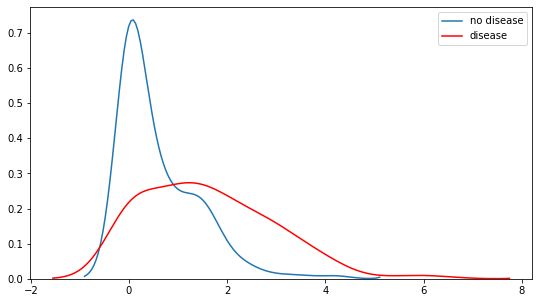

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df[df['target'] == 1]['oldpeak'], ax=ax)
sns.kdeplot(df[df['target'] == 0]['oldpeak'], c='r',  ax=ax)
plt.legend(['no disease', 'disease'])
plt.show() 

In [54]:
df[['oldpeak', 'target']].groupby(['target'], as_index=True).describe()

oldpeak                                               
         count      mean       std  min  25%  50%    75%  max
target                                                       
0        136.0  1.600735  1.302618  0.0  0.6  1.4  2.525  6.2
1        160.0  0.598750  0.787160  0.0  0.0  0.2  1.100  4.2

6. Number of Major Vessels (ca)

In [55]:
df.ca.value_counts()

0    173
1     65
2     38
3     20
Name: ca, dtype: int64

In [56]:
pd.crosstab(df['ca'], df['target'], margins=True).style.background_gradient(cmap='summer_r')

target,0,1,All
ca,,,
0,44,129,173
1,44,21,65
2,31,7,38
3,17,3,20
All,136,160,296


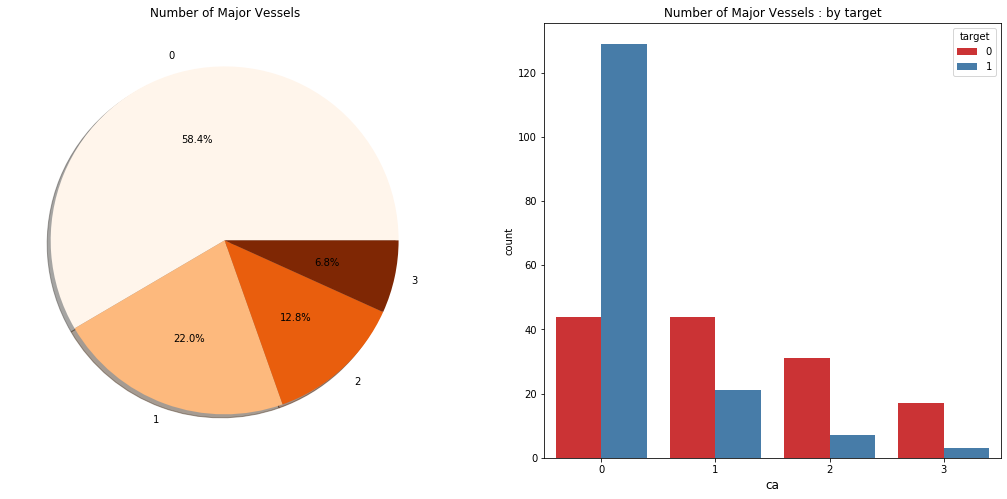

In [57]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
df.ca.value_counts().plot.pie( autopct='%1.1f%%', ax=ax[0], shadow=True,  cmap='Oranges')
ax[0].set_title('Number of Major Vessels')
ax[0].set_ylabel('')

sns.countplot(x='ca', data=df, hue='target', palette='Set1', ax=ax[1])
ax[1].set_title('Number of Major Vessels : by target')
ax[1].set_xlabel('ca', size =12)
plt.show()

Correlation ------------------------------

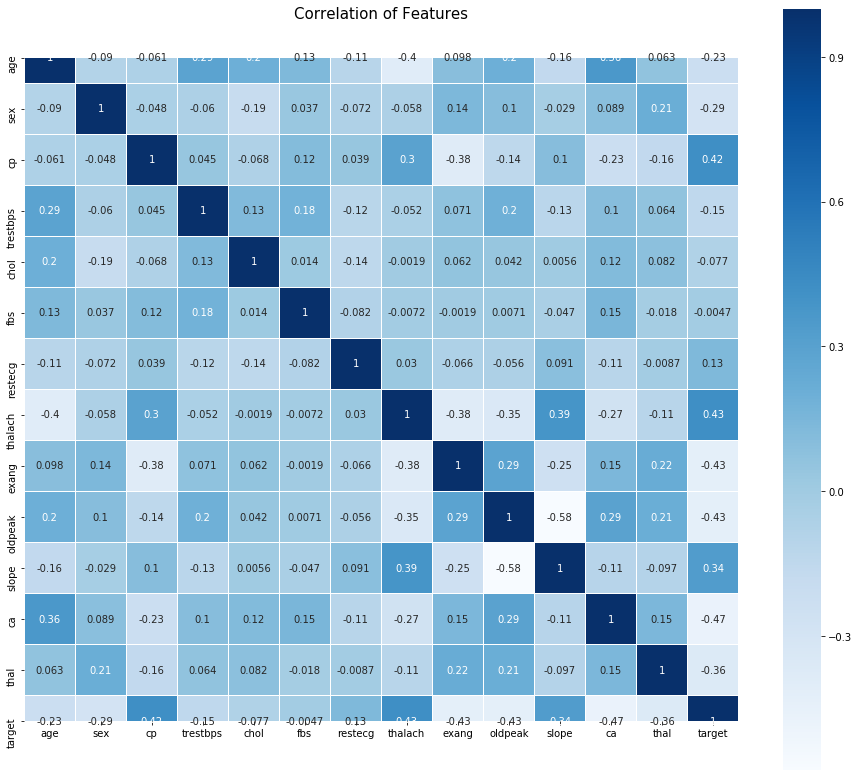

In [58]:
#all correlation
plt.figure(figsize=(16,14))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(), linewidths=0.1, vmax = 1.0, square = True, cmap='Blues', linecolor='white', annot =True, annot_kws={"size": 10})

cp, thalach, slope  & target -> positive corr

exang, oldpeak, ca, thal & target -> negative corr

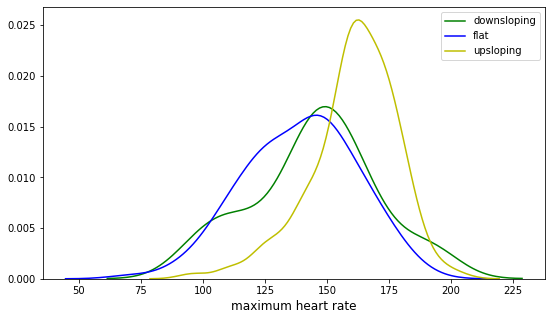

In [61]:
#slope & thalach -> positive corr
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df[df['slope'] == 0]['thalach'], c='g', ax=ax)
sns.kdeplot(df[df['slope'] == 1]['thalach'], c='b',  ax=ax)
sns.kdeplot(df[df['slope'] == 2]['thalach'], c='y',  ax=ax)

plt.legend(['downsloping', 'flat', 'upsloping'])
plt.xlabel('maximum heart rate', fontsize=12)


plt.show() 

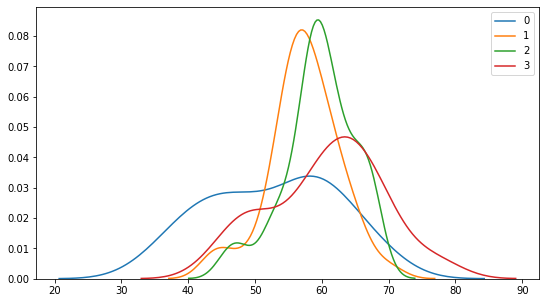

In [60]:
#age & ca -> positive corr
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df[(df['ca'] == 0) & (df['target'] == 0)]['age'], ax=ax)
sns.kdeplot(df[(df['ca'] == 1) & (df['target'] == 0)]['age'], ax=ax)
sns.kdeplot(df[(df['ca'] == 2) & (df['target'] == 0)]['age'], ax=ax)
sns.kdeplot(df[(df['ca'] == 3) & (df['target'] == 0)]['age'], ax=ax)

plt.legend(['0', '1', '2', '3'])
plt.show() 

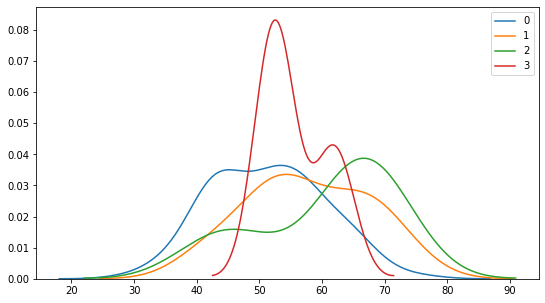

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df[(df['ca'] == 0) & (df['target'] == 1)]['age'], ax=ax)
sns.kdeplot(df[(df['ca'] == 1) & (df['target'] == 1)]['age'], ax=ax)
sns.kdeplot(df[(df['ca'] == 2) & (df['target'] == 1)]['age'], ax=ax)
sns.kdeplot(df[(df['ca'] == 3) & (df['target'] == 1)]['age'], ax=ax)

plt.legend(['0', '1', '2', '3'])
plt.show() 

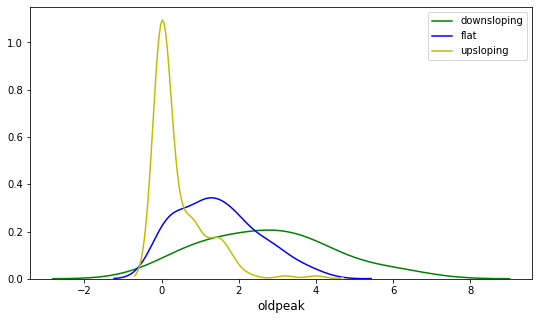

In [63]:
#slope & oldpeak -> negative corr
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df[df['slope'] == 0]['oldpeak'], c='g', ax=ax)
sns.kdeplot(df[df['slope'] == 1]['oldpeak'], c='b',  ax=ax)
sns.kdeplot(df[df['slope'] == 2]['oldpeak'], c='y',  ax=ax)

plt.legend(['downsloping', 'flat', 'upsloping'])
plt.xlabel('oldpeak', fontsize=12)
plt.show() 

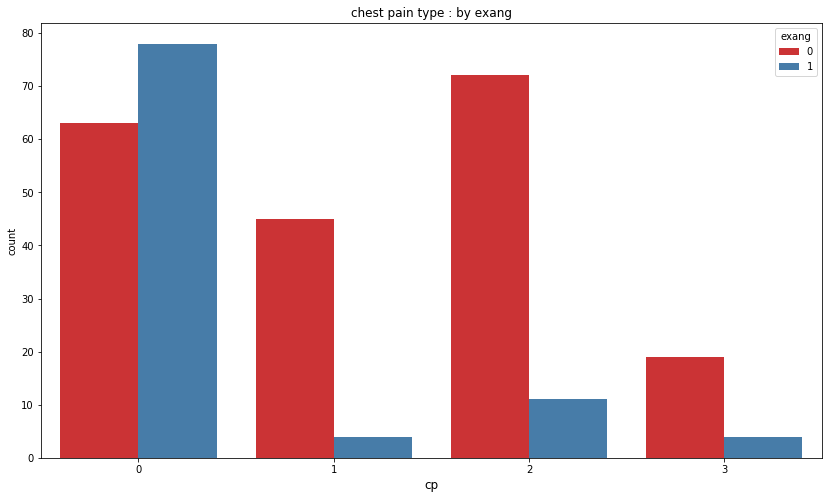

In [63]:
# exang & cp -> negative corr
f, ax = plt.subplots(1, 1, figsize=(14,8))
sns.countplot(x='cp', data=df, hue='exang', palette='Set1', ax=ax)
ax.set_title('chest pain type : by exang')
ax.set_xlabel('cp', size =12)
plt.show()

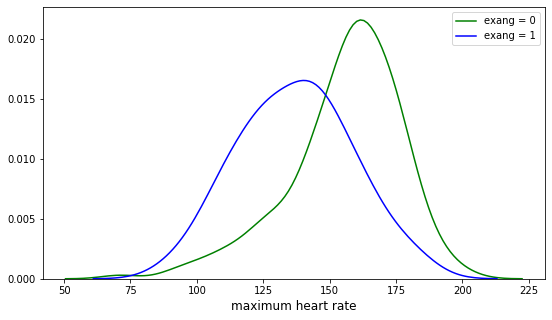

In [60]:
#exang & thalach -> negative corr
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df[df['exang'] == 0]['thalach'], c='g', ax=ax)
sns.kdeplot(df[df['exang'] == 1]['thalach'], c='b',  ax=ax)

plt.legend(['exang = 0', 'exang = 1'])
plt.xlabel('maximum heart rate', fontsize=12)
plt.show() 

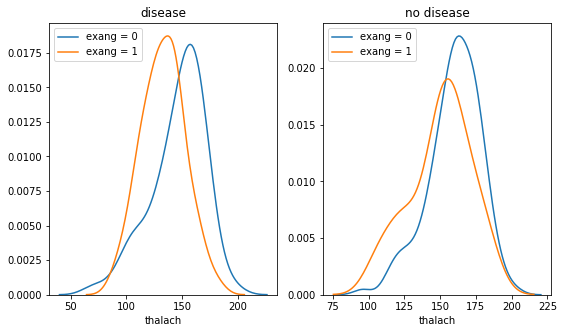

In [65]:
fig, ax = plt.subplots(1, 2, figsize=(9, 5))
sns.kdeplot(df[(df['exang'] == 0) & (df['target'] == 0)]['thalach'], ax=ax[0])
sns.kdeplot(df[(df['exang'] == 1) & (df['target'] == 0)]['thalach'], ax=ax[0])
ax[0].set_title('disease')
ax[0].set_xlabel('thalach')
ax[0].legend(['exang = 0', 'exang = 1'])

sns.kdeplot(df[(df['exang'] == 0) & (df['target'] == 1)]['thalach'], ax=ax[1])
sns.kdeplot(df[(df['exang'] == 1) & (df['target'] == 1)]['thalach'], ax=ax[1])
ax[1].set_title('no disease')
ax[1].set_xlabel('thalach')
ax[1].legend(['exang = 0', 'exang = 1'])
plt.show() 

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 14 Text xticklabel objects>)

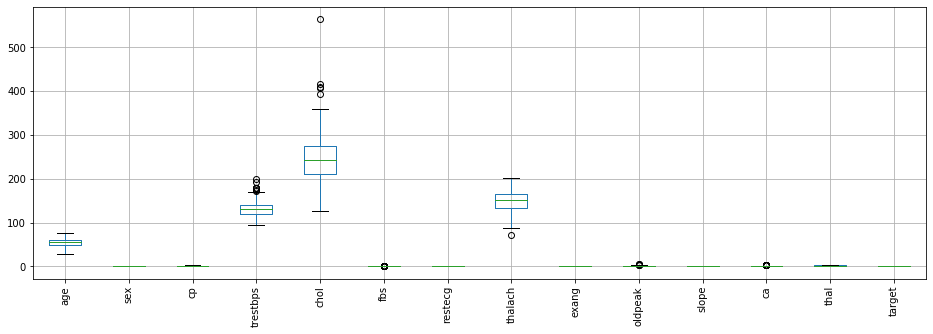

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(16, 5)) # 그냥 outlier 체크
df.boxplot()
plt.xticks(rotation = 90)

/Users/healthcarelab/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/healthcarelab/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


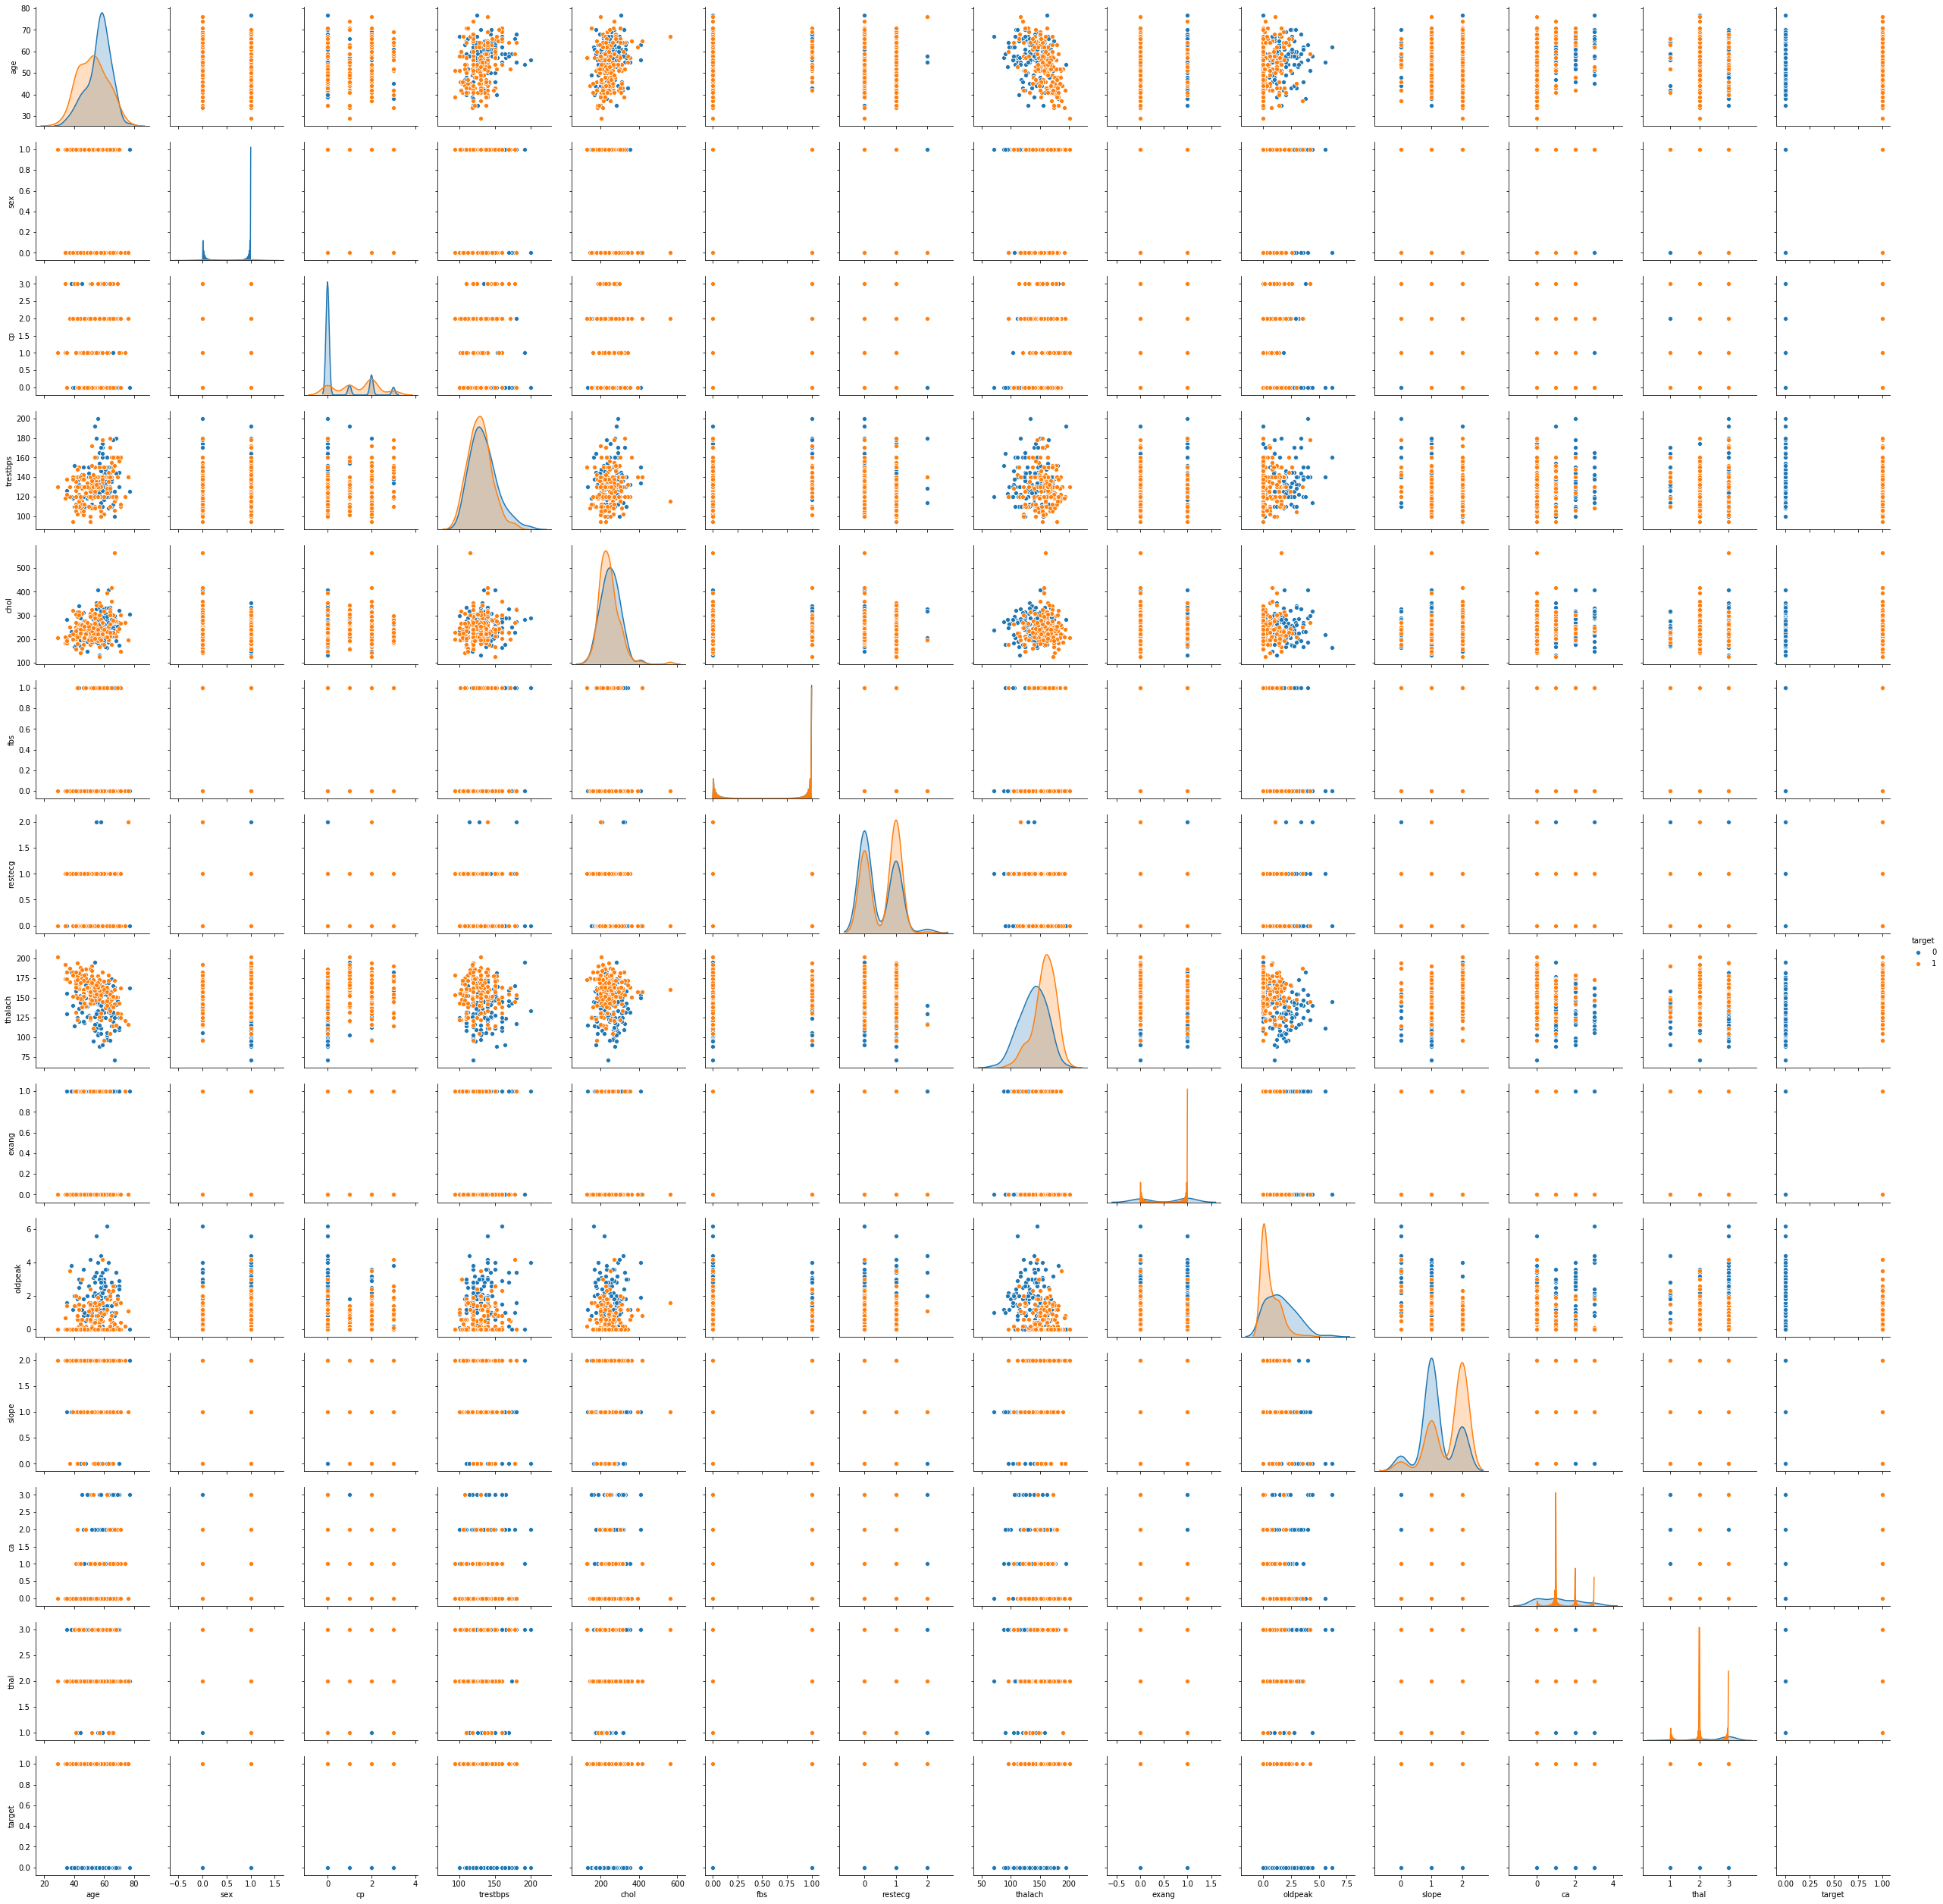

In [67]:
sns.pairplot(df, hue='target')
plt.show()

In [68]:
from sklearn.linear_model import LogisticRegression

In [71]:
from sklearn.model_selection import train_test_split

In [73]:
train, valid = train_test_split(df, test_size = 0.2, random_state=0)

In [74]:
train_y = train['target']
train_x = train.drop(['target'], axis=1)

In [75]:
valid_y = valid['target']
valid_x = valid.drop(['target'], axis=1)

In [76]:
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(train_x, train_y)
pred_y = lr.predict(valid_x)

/Users/healthcarelab/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [77]:
print("Misclassification samples : %d" %(valid_y != pred_y).sum()) #제대로 분류되지 않은 data 개수

Misclassification samples : 9


In [78]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
print("accuracy: %.2f" %accuracy_score(valid_y, pred_y))
print("Precision : %.3f" %precision_score(valid_y, pred_y))
print("Recall : %.3f" %recall_score(valid_y, pred_y))
print("F1 : %3.f" %f1_score(valid_y, pred_y))

accuracy: 0.85
Precision : 0.788
Recall : 0.929
F1 :   1


### Logistic Regression

In [93]:
train_cols = df.columns[:12]

In [94]:
train_cols

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca'],
      dtype='object')

In [95]:
import statsmodels.api as sm
logit = sm.Logit(df['target'], df[train_cols])

In [96]:
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.348463
         Iterations 7


In [101]:
print (result.summary())

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  296
Model:                          Logit   Df Residuals:                      284
Method:                           MLE   Df Model:                           11
Date:                Wed, 29 Apr 2020   Pseudo R-squ.:                  0.4949
Time:                        15:58:47   Log-Likelihood:                -103.14
converged:                       True   LL-Null:                       -204.20
Covariance Type:            nonrobust   LLR p-value:                 2.720e-37
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0194      0.020      0.974      0.330      -0.020       0.059
sex           -1.9866      0.449     -4.426      0.000      -2.866      -1.107
cp             0.7740      0.185      4.190      0.0

In [102]:
print (np.exp(result.params)) # odds ratio 

age         1.019633
sex         0.137167
cp          2.168386
trestbps    0.977011
chol        0.994537
fbs         2.187580
restecg     1.361224
thalach     1.028429
exang       0.366095
oldpeak     0.696968
slope       2.257014
ca          0.262388
dtype: float64


In [103]:
df_1 = df.drop("chol", axis =1)

In [104]:
df_1.head()

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,0,1,163,1,0.6,2,0,2,1


In [105]:
df_1 = df_1.drop("fbs", axis=1)
df_1 = df_1.drop("restecg", axis=1)
df_1.head()

,age,sex,cp,trestbps,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,150,0,2.3,0,0,1,1
1,37,1,2,130,187,0,3.5,0,0,2,1
2,41,0,1,130,172,0,1.4,2,0,2,1
3,56,1,1,120,178,0,0.8,2,0,2,1
4,57,0,0,120,163,1,0.6,2,0,2,1


In [106]:
sample_cols = df_1.columns[:10]

In [107]:
sample_cols

Index(['age', 'sex', 'cp', 'trestbps', 'thalach', 'exang', 'oldpeak', 'slope',
       'ca', 'thal'],
      dtype='object')

In [108]:
logit = sm.Logit(df_1['target'], df_1[sample_cols])
result = logit.fit()
print (result.summary())

Optimization terminated successfully.
         Current function value: 0.335856
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  296
Model:                          Logit   Df Residuals:                      286
Method:                           MLE   Df Model:                            9
Date:                Wed, 29 Apr 2020   Pseudo R-squ.:                  0.5132
Time:                        16:15:00   Log-Likelihood:                -99.413
converged:                       True   LL-Null:                       -204.20
Covariance Type:            nonrobust   LLR p-value:                 3.257e-40
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0238      0.019      1.251      0.211      -0.013       0.061
sex           -1.5781      0.

In [109]:
print(result.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.513     
Dependent Variable: target           AIC:              218.8268  
Date:               2020-04-29 16:16 BIC:              255.7303  
No. Observations:   296              Log-Likelihood:   -99.413   
Df Model:           9                LL-Null:          -204.20   
Df Residuals:       286              LLR p-value:      3.2570e-40
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
age            0.0238    0.0190   1.2514  0.2108  -0.0135   0.0612
sex           -1.5781    0.4484  -3.5197  0.0004  -2.4569  -0.6993
cp             0.8068    0.1864   4.3281  0.0000   0.4414   1.1721
trestbps      -0.0214    0.010

양수이면 target이 '1'인 확률일 높아진다는 뜻. 음수면 '0'인 확률이 높아진다는 뜻.
오즈비가 1을 기준으로 큰지 작은지를 파악하여 종속변수에 미치는 영향을 파악할 수 있음. 